In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('C:\\Users\\vishw\\excelr drive files\\Assignments questions of excelr\\Recommended_system\\book.csv')
data

,Unnamed: 0,UserID,BookTitle,BookRating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


# Number of unique users 

In [3]:
len(data.UserID.unique())

2182

In [4]:
len(data.BookTitle.unique())

9659

In [5]:
len(data.BookRating.unique())

10

In [6]:
data[data.duplicated(keep=False)]

,Unnamed: 0,UserID,BookTitle,BookRating


In [17]:
data["BookTitle"].isnull().sum() 

0

In [18]:
data["BookRating"].isnull().sum() 

0

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english") 

In [21]:
tfidf_matrix = tfidf.fit_transform(data['BookTitle']) 
tfidf_matrix.shape

(10000, 11338)

C:\Users\vishw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


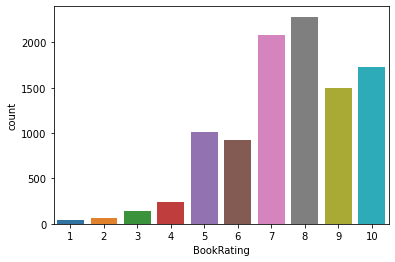

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data['BookRating'])
plt.show()

In [24]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix)

In [25]:
book_index = pd.Series(data.index,index=data['BookTitle']).drop_duplicates()

In [26]:
book_index['Decision in Normandy']

2

In [27]:
book_index['The Mummies of Urumchi']

4

In [39]:
def get_book_recommendations(Name,topN):
    #topN = 10
    # Getting the book index using its title 
    book_id = book_index[Name]
    
    # Getting the pair wise similarity score for all the anime's with that 
    # anime
    cosine_scores = list(enumerate(cosine_sim_matrix[book_id]))
    
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores,key=lambda x:x[1],reverse = True)
    
    # Get the scores of top 10 most similar book's 
    cosine_scores_10 = cosine_scores[0:topN+1]
    
    # Getting the book index 
    book_idx  =  [i[0] for i in cosine_scores_10]
    book_scores =  [i[1] for i in cosine_scores_10]
    
    # Similar movies and scores
    book_similar = pd.DataFrame(columns=["BookTitle","BookRating"])
    book_similar["BookTitle"] = data.loc[book_idx,"BookTitle"]
    book_similar["BookRating"] = book_scores
    book_similar.reset_index(inplace=True)  
    book_similar.drop(["index"],axis=1,inplace=True)
    print (book_similar)

In [40]:
get_book_recommendations("The Mummies of Urumchi",topN=5)

                                           BookTitle  BookRating
0                             The Mummies of Urumchi         1.0
1                                Classical Mythology         0.0
2                                       Clara Callan         0.0
3                               Decision in Normandy         0.0
4  Flu: The Story of the Great Influenza Pandemic...         0.0
5                             The Kitchen God's Wife         0.0
